In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


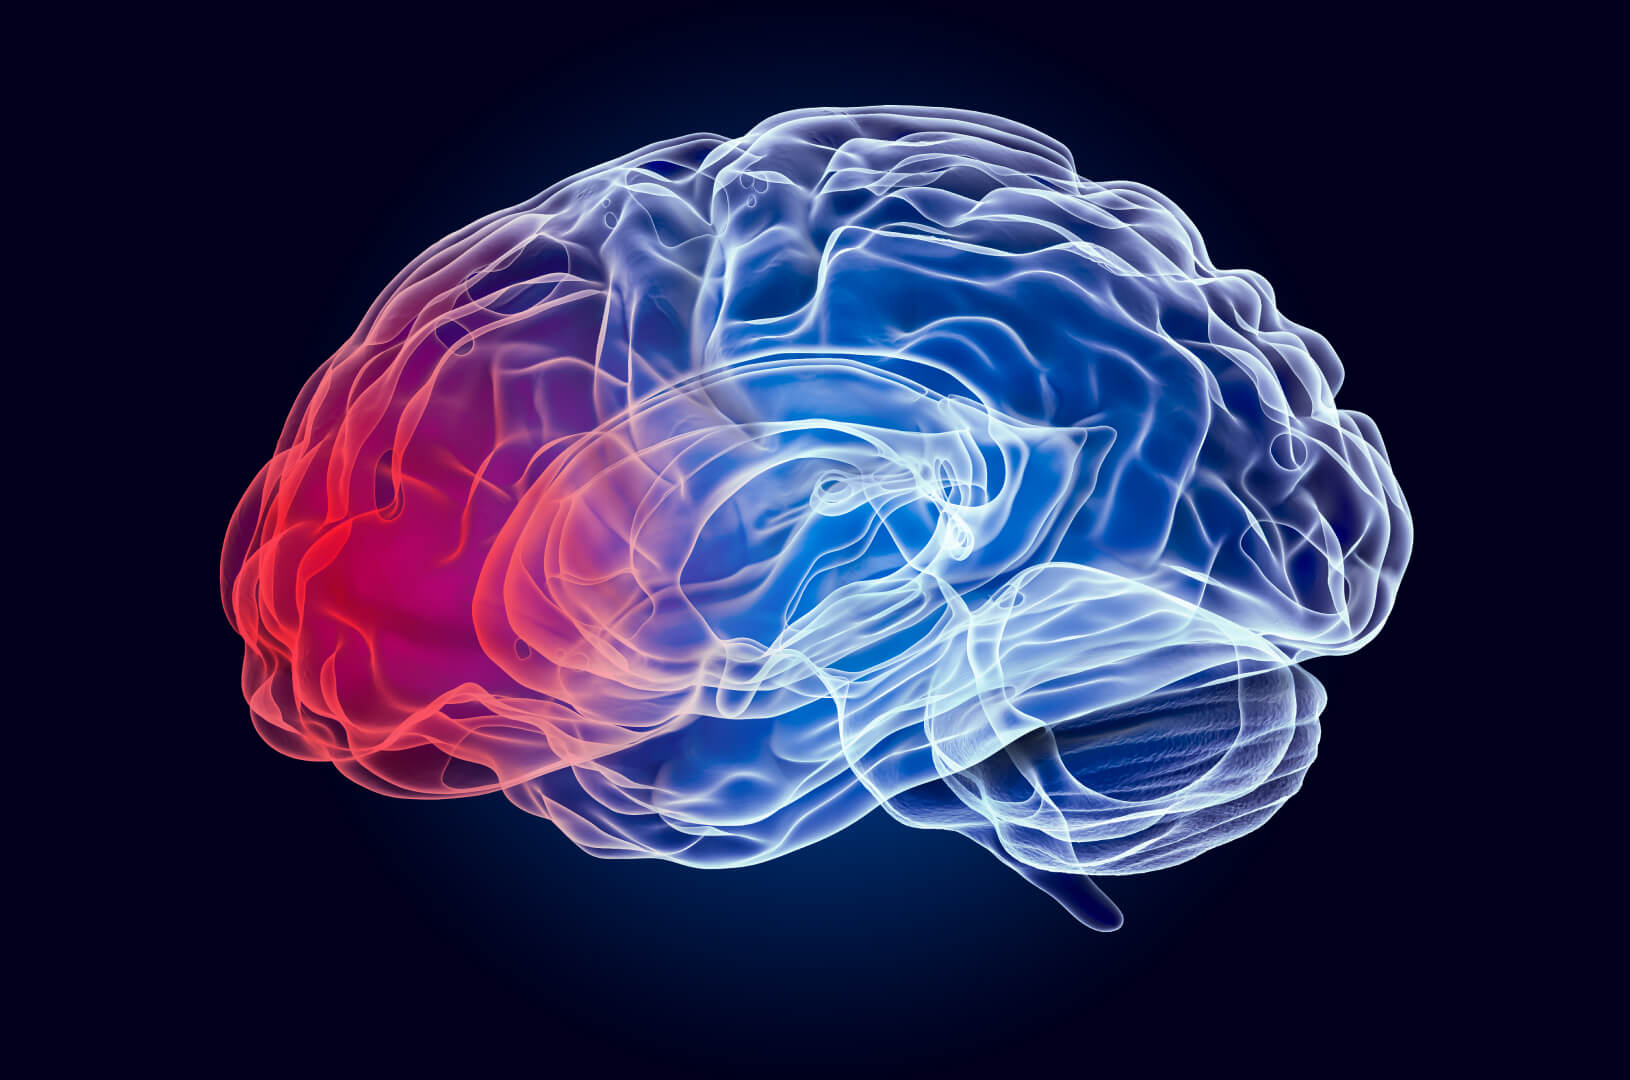

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/parkinsons_5000.csv')

In [ ]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S35_3,188.620,216.302,165.982,0.01719,0.00009,0.00996,0.01027,0.02987,0.07118,...,0.10422,0.08069,12.298,1,0.552870,0.764036,-3.377325,0.335357,2.631793,0.418646
1,phon_R01_S35_4,202.632,565.740,177.258,0.01627,0.00008,0.00919,0.00963,0.02756,0.07170,...,0.10546,0.07889,14.989,1,0.427627,0.775708,-4.892495,0.262281,2.631793,0.270173
2,phon_R01_S35_5,186.695,211.961,149.442,0.01872,0.00010,0.01075,0.01154,0.03225,0.05830,...,0.08096,0.10952,12.529,1,0.507826,0.762726,-4.484303,0.340256,2.631793,0.301487
3,phon_R01_S35_6,192.818,224.429,168.793,0.03107,0.00016,0.01800,0.01958,0.05401,0.11908,...,0.16942,0.21713,8.441,1,0.625866,0.768320,-2.434031,0.450493,2.631793,0.527367
4,phon_R01_S35_7,198.116,233.099,174.478,0.02714,0.00014,0.01568,0.01699,0.04705,0.08684,...,0.12851,0.16265,9.449,1,0.584164,0.754449,-2.839756,0.356224,2.631793,0.454721


In [ ]:
df.shape

(2057, 24)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2057 entries, 0 to 2056
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              2057 non-null   object 
 1   MDVP:Fo(Hz)       2057 non-null   float64
 2   MDVP:Fhi(Hz)      2057 non-null   float64
 3   MDVP:Flo(Hz)      2057 non-null   float64
 4   MDVP:Jitter(%)    2057 non-null   float64
 5   MDVP:Jitter(Abs)  2057 non-null   float64
 6   MDVP:RAP          2057 non-null   float64
 7   MDVP:PPQ          2057 non-null   float64
 8   Jitter:DDP        2057 non-null   float64
 9   MDVP:Shimmer      2057 non-null   float64
 10  MDVP:Shimmer(dB)  2057 non-null   float64
 11  Shimmer:APQ3      2057 non-null   float64
 12  Shimmer:APQ5      2057 non-null   float64
 13  MDVP:APQ          2057 non-null   float64
 14  Shimmer:DDA       2057 non-null   float64
 15  NHR               2057 non-null   float64
 16  HNR               2057 non-null   float64


In [ ]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(2057, 24)

In [ ]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [ ]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.00000,2057.000000,2057.000000,2057.000000,2057.000000,...,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000
mean,2404.369080,182.564644,119.005303,0.006001,0.000042,0.00317,0.003325,0.009525,0.028459,0.270124,...,0.044984,0.023409,21.820325,0.684978,0.492669,0.716508,-5.834525,0.209294,2.475307,0.199351
std,8526.119882,90.344162,45.538921,0.004680,0.000034,0.00284,0.002662,0.008545,0.018219,0.188770,...,0.029326,0.038589,4.689371,0.464638,0.104059,0.055462,1.076189,0.087778,0.312391,0.090122
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.00068,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,120.552000,123.109000,86.180000,0.003330,0.000020,0.00165,0.001860,0.004880,0.016420,0.145000,...,0.024290,0.005400,19.147000,0.000000,0.414783,0.669565,-6.547148,0.152941,2.278687,0.131728
50%,128.451000,159.866000,104.773000,0.004760,0.000030,0.00232,0.002540,0.007150,0.021840,0.209000,...,0.036150,0.010490,22.244000,1.000000,0.486738,0.722085,-5.966779,0.205660,2.631793,0.184985
75%,178.285000,217.552000,142.822000,0.007090,0.000050,0.00370,0.003890,0.011120,0.035270,0.334000,...,0.054170,0.024310,25.135000,1.000000,0.583390,0.761255,-5.248776,0.264967,2.631793,0.247455
max,34567.000000,592.030000,239.170000,0.033160,0.000260,0.02144,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
df[['MDVP:Shimmer', 'NHR']] = df[['MDVP:Shimmer', 'NHR']].replace(0, np.nan)

In [ ]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.00000,2057.000000,2057.000000,2057.000000,2057.000000,...,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000,2057.000000
mean,2404.369080,182.564644,119.005303,0.006001,0.000042,0.00317,0.003325,0.009525,0.028459,0.270124,...,0.044984,0.023409,21.820325,0.684978,0.492669,0.716508,-5.834525,0.209294,2.475307,0.199351
std,8526.119882,90.344162,45.538921,0.004680,0.000034,0.00284,0.002662,0.008545,0.018219,0.188770,...,0.029326,0.038589,4.689371,0.464638,0.104059,0.055462,1.076189,0.087778,0.312391,0.090122
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.00068,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,120.552000,123.109000,86.180000,0.003330,0.000020,0.00165,0.001860,0.004880,0.016420,0.145000,...,0.024290,0.005400,19.147000,0.000000,0.414783,0.669565,-6.547148,0.152941,2.278687,0.131728
50%,128.451000,159.866000,104.773000,0.004760,0.000030,0.00232,0.002540,0.007150,0.021840,0.209000,...,0.036150,0.010490,22.244000,1.000000,0.486738,0.722085,-5.966779,0.205660,2.631793,0.184985
75%,178.285000,217.552000,142.822000,0.007090,0.000050,0.00370,0.003890,0.011120,0.035270,0.334000,...,0.054170,0.024310,25.135000,1.000000,0.583390,0.761255,-5.248776,0.264967,2.631793,0.247455
max,34567.000000,592.030000,239.170000,0.033160,0.000260,0.02144,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
df.drop(columns='name',inplace=True)

<Axes: >

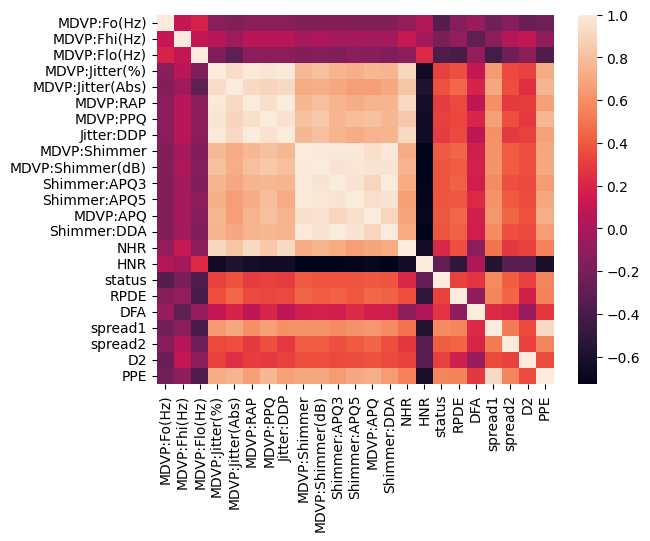

In [ ]:
sns.heatmap((df).corr())

In [ ]:
df.isna().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
# distribution of target Variable
df['status'].value_counts()

status
1    1409
0     648
Name: count, dtype: int64

1  --> Parkinson's Positive

0 --> Healthy


Data Pre-Processing

In [ ]:
x = df.drop(columns='status')
y = df['status']

In [ ]:
y.value_counts()

status
1    1409
0     648
Name: count, dtype: int64

In [ ]:
under=RandomUnderSampler()
x,y=under.fit_resample(x,y)

In [ ]:
y.value_counts()

status
0    648
1    648
Name: count, dtype: int64

In [ ]:
print(x)

      MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0         236.200       244.663       102.137         0.00277   
1         237.323       243.709       229.256         0.00303   
2         260.105       264.919       237.303         0.00339   
3         197.569       217.627        90.794         0.00803   
4         240.301       245.135       219.783         0.00517   
...           ...           ...           ...             ...   
1291      178.222       202.450       141.047         0.00321   
1292      120.552       190.204       129.859         0.00314   
1293       96.106       108.664        84.510         0.00694   
1294      120.552       206.008        78.032         0.00742   
1295      120.552       139.710       111.208         0.00405   

      MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0              0.00001   0.00154   0.00153     0.00462       0.02448   
1              0.00001   0.00173   0.00159     0.00519       0.01242   
2  

In [ ]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1291    1
1292    1
1293    1
1294    1
1295    1
Name: status, Length: 1296, dtype: int64


Splitting the data to training data & Test data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=2)

In [ ]:
ss=StandardScaler()
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)

In [ ]:
print(x.shape, x_train.shape, x_test.shape)

(1296, 22) (842, 22) (454, 22)


Model Training

In [ ]:
sv=SVC()
kn=KNeighborsClassifier()
LR=LogisticRegression()
dt=DecisionTreeClassifier()
models=[sv,kn,LR,dt]
evaluation={'name':[],'accuracy':[]}
for model in models:
  model.fit(x_train_scaled,y_train)
  y_pred=model.predict(x_test_scaled)
  accuracy=accuracy_score(y_test,y_pred)
  evaluation['name'].append(model)
  evaluation['accuracy'].append(accuracy)
  print(model)
  print(classification_report(y_test,y_pred))
  print('_______________________________________________________')

SVC()
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       228
           1       0.94      0.86      0.90       226

    accuracy                           0.91       454
   macro avg       0.91      0.91      0.91       454
weighted avg       0.91      0.91      0.91       454

_______________________________________________________
KNeighborsClassifier()
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       228
           1       1.00      0.94      0.97       226

    accuracy                           0.97       454
   macro avg       0.97      0.97      0.97       454
weighted avg       0.97      0.97      0.97       454

_______________________________________________________
LogisticRegression()
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       228
           1       0.84      0.83      0.83       226

    accuracy        

Saving the trained model

In [ ]:
import pickle
needed_files = {'model': sv, 'scaler': ss}
filename = 'parkinsons_model_scaler.sav'
with open(filename, 'wb') as file:
    pickle.dump(needed_files, file)

In [ ]:
for column in x.columns:
  print(column)

MDVP:Fo(Hz)
MDVP:Fhi(Hz)
MDVP:Flo(Hz)
MDVP:Jitter(%)
MDVP:Jitter(Abs)
MDVP:RAP
MDVP:PPQ
Jitter:DDP
MDVP:Shimmer
MDVP:Shimmer(dB)
Shimmer:APQ3
Shimmer:APQ5
MDVP:APQ
Shimmer:DDA
NHR
HNR
RPDE
DFA
spread1
spread2
D2
PPE
